In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import List

from scipy.spatial.distance import squareform, pdist
from sklearn import datasets, cluster, metrics
from sklearn.preprocessing import StandardScaler

UNLABELED = -1
CURRENT_LABEL = -2
CORE = 1


class DBSCAN:

    def __init__(self, eps: float, min_samples: int):
        """ Initialize DBSCAN Cluster
            :param eps: float
                The maximum distance between two samples for one to be considered as in the neighborhood of the other.
            :param min_samples: int
                The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
        """
        self.eps: float = eps
        self.min_samples: int = min_samples
        self.labels = None
        self.is_core_labels = None

    def _get_near_pts(self, i: int, distance_mat: np.ndarray) -> List[int]:
        """ Get all points in eps """
        return list(np.where(distance_mat[i] <= self.eps)[0])

    def _find_core_pts(self, distance_mat: np.ndarray) -> List[int]:
        """ Get Core point list """
        return [int(len(self._get_near_pts(i, distance_mat)) >= self.min_samples)
                for i in range(len(distance_mat))]

    def fit(self, X: np.ndarray, y: np.ndarray) -> List[int]:
        """ Train our DBSCAN """

        y = y.astype(int)

        dists_mat = squareform(pdist(X))
        core_pts_queue = []

        self.labels = [UNLABELED for _ in X]
        self.is_core_labels = self._find_core_pts(dists_mat)

        for i in range(len(X)):  # Assign each data point
            if self.labels[i] != UNLABELED or self.is_core_labels[i] != CORE:
                continue  # Skip, if current point has already assigned, or is not a core point

            curr_cluster_pts_ids = [i]

            # Label current point
            curr_pts_id = i
            self.labels[curr_pts_id] = CURRENT_LABEL

            # Find all near points around current point, and assign them.
            while True:
                near_pts: List[int] = self._get_near_pts(curr_pts_id, dists_mat)
                for j in near_pts:
                    if self.labels[j] == UNLABELED:

                        # Add unlabeled point into current cluster list
                        self.labels[j] = CURRENT_LABEL
                        curr_cluster_pts_ids.append(j)

                        if self.is_core_labels[j]:
                            core_pts_queue.append(j)  # Add core point into queue

                if len(core_pts_queue) == 0:
                    break  # Already find all near point in current cluster, stop searching ...
                else:
                    curr_pts_id = core_pts_queue.pop()  # Pop a core point from list, continue assigning

            true_label = np.bincount(np.take(y, curr_cluster_pts_ids)).argmax()
            for k in curr_cluster_pts_ids:
                self.labels[k] = true_label

        remained_pts_ids = [i for i in range(len(self.labels)) if self.labels[i] == UNLABELED]
        if remained_pts_ids:
            true_label = np.bincount(np.take(y, remained_pts_ids)).argmax()
            for k in remained_pts_ids:
                self.labels[k] = true_label

        return self.labels


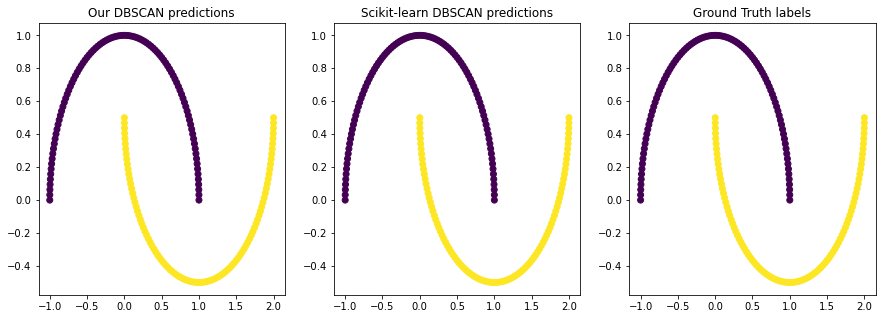

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [2]:
# Test Case 1
data, label = datasets.make_moons(200)

# Our DBSCAN
dbscan_our = DBSCAN(eps=.5, min_samples=2)
pred_our = dbscan_our.fit(data, label)

# Scikit-Learn DBSCAN
dbscan_sk = cluster.DBSCAN(eps=.5, min_samples=2)
pred_sk = dbscan_sk.fit_predict(data, label)

# Plot
f, axe = plt.subplots(1, 3, figsize=(15, 5))
axe[0].scatter(data[:, 0], data[:, 1], c=pred_our)
axe[0].set_title("Our DBSCAN predictions")
axe[1].scatter(data[:, 0], data[:, 1], c=pred_sk)
axe[1].set_title("Scikit-learn DBSCAN predictions")
axe[2].scatter(data[:, 0], data[:, 1], c=label)
axe[2].set_title("Ground Truth labels")
plt.show()

print(metrics.classification_report(y_true=label, y_pred=pred_our))

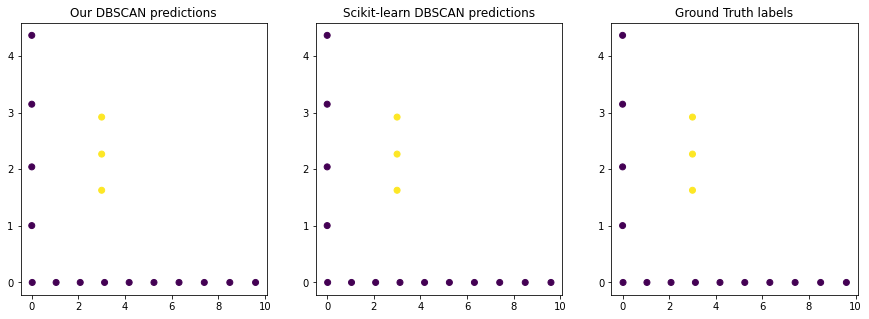

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00         3

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [3]:
# Test Case 2
data_df = pd.read_csv("implementation_correctness_dataset.csv", dtype=float)
data = data_df.iloc[:, :2].to_numpy()
label = data_df.iloc[:, -1].to_numpy()

# Our DBSCAN
dbscan_our = DBSCAN(eps=1.25, min_samples=2)
pred_our = dbscan_our.fit(data, label)

# Scikit-Learn DBSCAN
dbscan_sk = cluster.DBSCAN(eps=1.25, min_samples=2)
pred_sk = dbscan_sk.fit_predict(data, label)

# Plot
f, axe = plt.subplots(1, 3, figsize=(15, 5))
axe[0].scatter(data[:, 0], data[:, 1], c=pred_our)
axe[0].set_title("Our DBSCAN predictions")
axe[1].scatter(data[:, 0], data[:, 1], c=pred_sk)
axe[1].set_title("Scikit-learn DBSCAN predictions")
axe[2].scatter(data[:, 0], data[:, 1], c=label)
axe[2].set_title("Ground Truth labels")
plt.show()

print(metrics.classification_report(y_true=label, y_pred=pred_our))

In [2]:
import pandas as pd

df = pd.read_csv('data.csv')

In [3]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
##https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.iloc[:, 2:-1], df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import normalized_mutual_info_score, silhouette_score

all_nmi_scores = []

for min_samples in range(1, 10):
    y_ = np.where(y == 'B', 0, 1)
    
    nmi_scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, stratify=y_)
        
        dbscan = DBSCAN(min_samples=2, eps=1.25)
        dbscan.fit(X_train, y_train)
        y_pred = dbscan.labels_

        score = normalized_mutual_info_score(y_train, y_pred)
        
        nmi_scores.append(score)
        
    all_nmi_scores.append(nmi_scores)

Text(0, 0.5, 'Normalized Mutual Information')

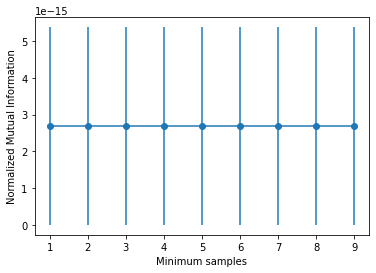

In [9]:
lower_error = np.min(all_nmi_scores, axis=1)
upper_error = np.max(all_nmi_scores, axis=1)

y_error = np.array(list(zip(lower_error, upper_error))).T
plt.errorbar(np.arange(1, 10), np.mean(all_nmi_scores, axis=1), yerr=y_error, marker='o')
plt.xlabel('Minimum samples')
plt.ylabel('Normalized Mutual Information')

In [17]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def region_query(data, point_idx, eps):
    neighbors = []
    for i in range(data.shape[0]):
        if euclidean_distance(data[point_idx], data[i]) <= eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(data, cluster_result, point_idx, neighbors, cluster_id, eps, min_samples):
    cluster_result[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if cluster_result[neighbor_idx] == -1:
            cluster_result[neighbor_idx] = cluster_id
        elif cluster_result[neighbor_idx] == 0:
            cluster_result[neighbor_idx] = cluster_id
            neighbor_neighbors = region_query(data, neighbor_idx, eps)
            if len(neighbor_neighbors) >= min_samples:
                neighbors = neighbors + neighbor_neighbors
        i += 1

def dbscan_clustering(data, eps, min_samples):
    n = data.shape[0]
    cluster_result = np.zeros(n, dtype=int)
    cluster_id = 0
    for i in range(n):
        if cluster_result[i] != 0:
            continue
        neighbors = region_query(data, i, eps)
        if len(neighbors) < min_samples:
            cluster_result[i] = -1
        else:
            cluster_id += 1
            expand_cluster(data, cluster_result, i, neighbors, cluster_id, eps, min_samples)
    return cluster_result
import numpy as np


In [14]:
import pandas as pd
ds = pd.read_csv('./data/data.csv')
y = ds['diagnosis']
X = ds.drop('diagnosis', axis=1)
X = X.drop('id', axis=1)
i = len(X.columns)
X = X.drop(X.columns[i-1], axis=1)

y.replace(('M', 'B'), (1, 0), inplace=True)

data = X.to_numpy()

# Perform clustering using DBSCAN algorithm
eps = 125
min_samples = 5
clusters = dbscan_clustering(data, eps, min_samples)

# Print the cluster labels
print(clusters)

[-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [18]:
# Given 𝑁 data points expressed by the numerical features of our dataset (which describe a
# given breast mass), cluster those data points into a set of coherent clusters, where points within each cluster have high
# similarity, and points across clusters have low similarity.

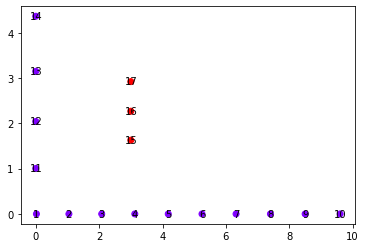

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
data = np.array([[0.02, 0],
                 [1.045, 0],
                 [2.08, 0],
                 [3.125, 0],
                 [4.18, 0],
                 [5.245, 0],
                 [6.32, 0],
                 [7.405, 0],
                 [8.5, 0],
                 [9.605, 0],
                 [0, 1.005],
                 [0, 2.042870939],
                 [0, 3.150676628],
                 [0, 4.367583474],
                 [3, 1.629462706],
                 [3, 2.268943877],
                 [3, 2.923103975]])

# Define the parameters for DBSCAN
eps = 1.25
min_samples = 2

# Run DBSCAN clustering
dbscan_labels = dbscan_clustering(data=data,eps=eps, min_samples=min_samples)

# Create a scatterplot with the order in which each point was visited
visited_order = np.arange(data.shape[0]) + 1
plt.scatter(data[:, 0], data[:, 1], c=dbscan_labels, cmap='rainbow')
for i, order in enumerate(visited_order):
    plt.text(data[i, 0], data[i, 1], str(order), ha='center', va='center', fontsize=10)
plt.savefig('./images/3.png')
plt.show()

# 1
# We can see that the order in which the points were visited by the algorithm makes sense because the points that are closer to each other are visited first, and then the algorithm moves to points that are farther away. This is because the algorithm starts from a random point and then expands the cluster by including all the points that are within a certain distance (eps) of that point. If a point is not within eps of any other point, it is considered a noise point. This process continues until there are no more points that can be added to the cluster.


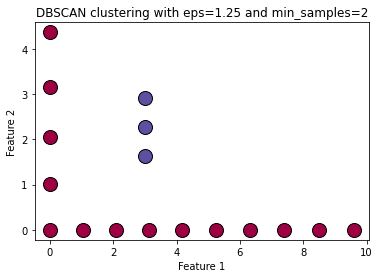

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(data, labels, eps, min_samples):
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[labels != -1] = True

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = data[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor='w',
                 markeredgecolor='k', markersize=8)

    plt.title('DBSCAN clustering with eps={:.2f} and min_samples={}'.format(eps, min_samples))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.savefig('./images/4.png')

    plt.show()
plot_clusters(data,dbscan_labels,eps,min_samples)
# 2
# A core point is a point that has at least min_pts points in its neighborhood, including itself. This means that a core point has a relatively dense neighborhood, and can potentially form a dense cluster.
# A non-core point, on the other hand, has fewer than min_pts points in its neighborhood. Non-core points may still belong to a cluster, but they cannot form their own cluster. Instead, they depend on core points to form a cluster.
# In our case, we have set min_pts=2 and ε=1.25. Looking at the dataset, we can see that the first 10 points all have a neighborhood of at least two points (including themselves), and are therefore core points. The remaining 8 points have only one point in their neighborhood, and are non-core points.
# We can denote the core points with filled circles and non-core points with empty circles to differentiate between them in the scatterplot.